In [4]:
import sys
sys.path.append('./../')
import torch_geometric as pyg
from torch_geometric.datasets import ZINC
from ogb.graphproppred import PygGraphPropPredDataset
import torch
import os.path as osp
import os
from tqdm import tqdm
from definitions import ROOT_DIR
from torch_geometric.utils import degree
import networkx as nx

In [5]:
root = os.path.join(ROOT_DIR, 'datasets')
zinc_raw_dir = osp.join(root, 'ZINC', 'raw')
molhiv_raw_dir = osp.join(root, 'MOLHIV', 'raw')

dataset1 = ZINC(zinc_raw_dir, subset=False, split='train')
dataset2 = ZINC(zinc_raw_dir, subset=False, split='val')
dataset3 = ZINC(zinc_raw_dir, subset=False, split='test')

dataset4 = PygGraphPropPredDataset('ogbg-molhiv', molhiv_raw_dir)

In [6]:
def morethanfour(g):
    degrees = degree(g.edge_index[1], g.x.size(0), dtype=g.x.dtype)
    kek = [(i in degrees) for i in range(20)]
    is_greater_in_mol = (degrees>7).sum()
    return kek

In [7]:
def draw(molecule):
    g = pyg.utils.to_networkx(molecule, to_undirected=False)
    nx.draw(g, with_labels=True, node_size=150)

In [8]:
# outlist = []
# for dataset in [dataset1, dataset2, dataset3]:
#     for i, g in tqdm(enumerate(dataset)):
#         outuple = morethanfour(g)
#         outlist.append(outuple)
#         if outuple[2]:
#             print()
#             print('MORE THAN FOUR DETECTED')
#             print(dataset)
#             print(i)
#             print(g)
#             print()

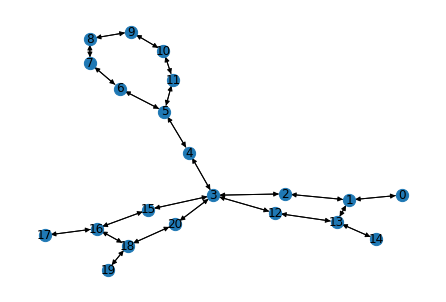

In [9]:
draw(dataset1[71128])

In [10]:
outlist = []
for dataset in [dataset4]:
    for i, g in tqdm(enumerate(dataset)):
        outuple = morethanfour(g)
        outlist.append(outuple)
        if outuple[10]:
            print()
            print('10 DETECTED')
            print(dataset)
            print(i)
            print(g)
            print()

6035it [00:06, 1014.98it/s]


10 DETECTED
PygGraphPropPredDataset(41127)
5927
Data(edge_attr=[88, 3], edge_index=[2, 88], x=[25, 9], y=[1, 1])



10364it [00:11, 646.21it/s]


10 DETECTED
PygGraphPropPredDataset(41127)
10299
Data(edge_attr=[64, 3], edge_index=[2, 64], x=[25, 9], y=[1, 1])



18247it [00:19, 978.52it/s] 


10 DETECTED
PygGraphPropPredDataset(41127)
18092
Data(edge_attr=[104, 3], edge_index=[2, 104], x=[45, 9], y=[1, 1])



41127it [00:49, 827.01it/s] 


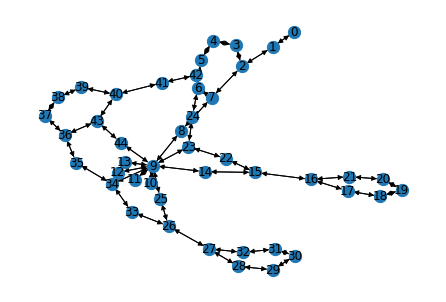

In [11]:
draw(dataset4[18092])

In [12]:
import pickle

# with open('datasets/ZINC/raw/raw/atom_dict.pickle', 'rb') as f:
# 	atom_dict = pickle.load(f)
# with open('datasets/ZINC/raw/raw/test.pickle', 'rb') as f:
# 	test = pickle.load(f)
# with open('datasets/ZINC/raw/raw/val.pickle', 'rb') as f:
# 	val = pickle.load(f)
with open('datasets/ZINC/raw/raw/train.pickle', 'rb') as f:
	train = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/ZINC/raw/raw/train.pickle'

In [ ]:
train[71128].keys()

dict_keys(['num_atom', 'atom_type', 'bond_type', 'logP_SA_cycle_normalized'])